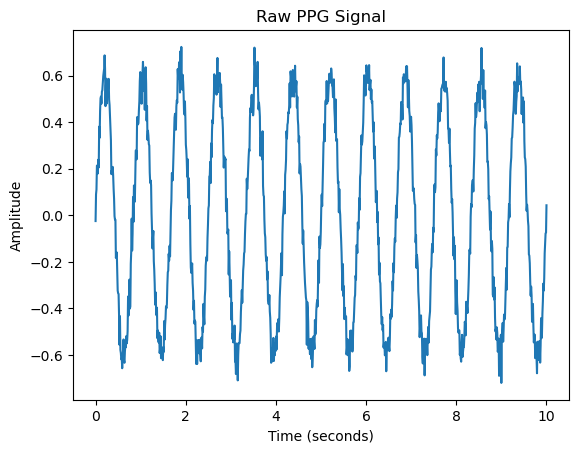

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating a PPG signal (replace with actual data)
fs = 100  # Sampling rate (Hz)
t = np.linspace(0, 10, fs * 10)  # 10 seconds of data
ppg_signal = 0.6 * np.sin(2 * np.pi * 1.2 * t) + np.random.normal(0, 0.05, len(t))

# Plotting the raw PPG signal
plt.plot(t, ppg_signal)
plt.title("Raw PPG Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


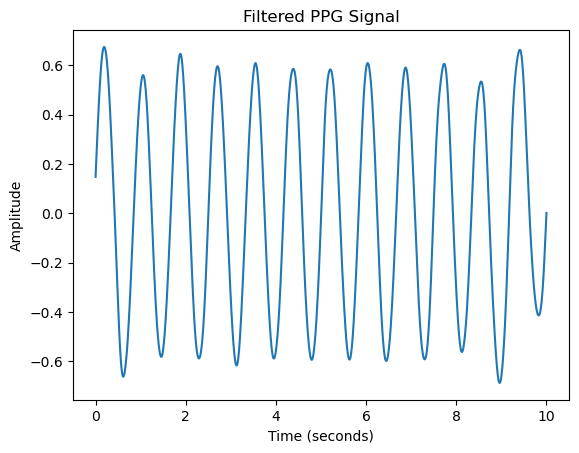

In [2]:
from scipy.signal import butter, filtfilt

# Bandpass filter design (0.5 to 5 Hz for heart rate detection)
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Filtered PPG signal
filtered_ppg = bandpass_filter(ppg_signal, 0.5, 5, fs)
plt.plot(t, filtered_ppg)
plt.title("Filtered PPG Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


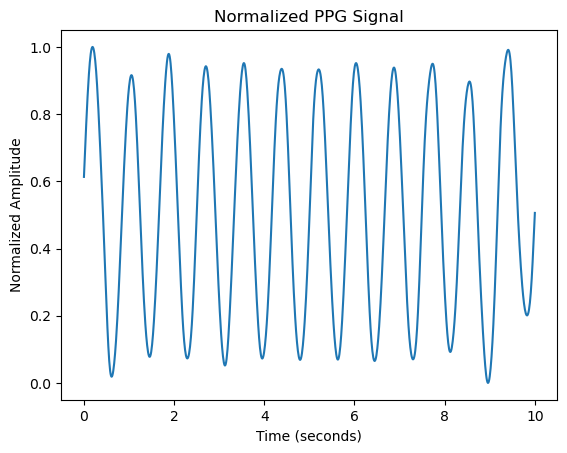

In [3]:
normalized_ppg = (filtered_ppg - np.min(filtered_ppg)) / (np.max(filtered_ppg) - np.min(filtered_ppg))
plt.plot(t, normalized_ppg)
plt.title("Normalized PPG Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Normalized Amplitude")
plt.show()


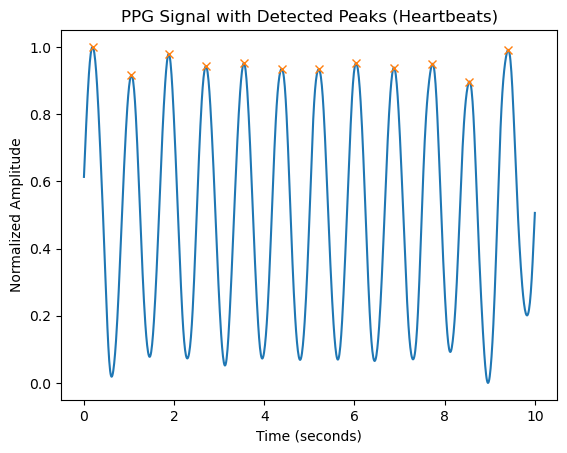

Heart Rate:  71.68175833415685  BPM


In [4]:
from scipy.signal import find_peaks

# Detect peaks in the PPG signal
peaks, _ = find_peaks(normalized_ppg, distance=fs*0.6)  # Minimum distance of 0.6 seconds between peaks (for HR < 100 BPM)

# Calculate Heart Rate (BPM)
ibi = np.diff(peaks) / fs  # Inter-beat interval in seconds
heart_rate = 60 / ibi  # Convert to beats per minute (BPM)

# Plot the PPG signal with detected peaks
plt.plot(t, normalized_ppg)
plt.plot(t[peaks], normalized_ppg[peaks], "x")
plt.title("PPG Signal with Detected Peaks (Heartbeats)")
plt.xlabel("Time (seconds)")
plt.ylabel("Normalized Amplitude")
plt.show()

print("Heart Rate: ", np.mean(heart_rate), " BPM")


In [5]:
#Oxygen Saturation (SpO2) Calculation
# Assume red and infrared PPG signals (simulated)
red_ppg = 0.7 * np.sin(2 * np.pi * 1.2 * t) + np.random.normal(0, 0.05, len(t))
infrared_ppg = 0.6 * np.sin(2 * np.pi * 1.2 * t) + np.random.normal(0, 0.05, len(t))

# SpO2 estimation (simplified version)
ratio = np.mean(red_ppg) / np.mean(infrared_ppg)
SpO2 = 110 - 25 * ratio  # Formula depends on device calibration

print("Estimated SpO2: ", SpO2, "%")


Estimated SpO2:  72.429133113864 %


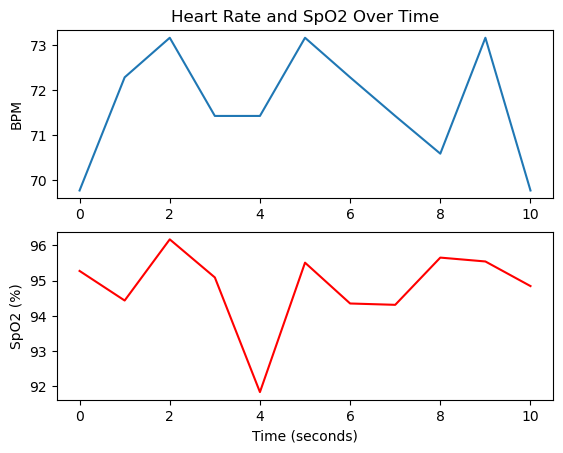

In [6]:
import matplotlib.pyplot as plt

# Simulated heart rate and SpO2 data
time = np.arange(0, len(heart_rate))  # Time index for heart rate
SpO2_values = np.random.normal(95, 1, len(time))  # Simulated SpO2 values

# Plotting heart rate and SpO2
plt.subplot(2, 1, 1)
plt.plot(time, heart_rate, label='Heart Rate (BPM)')
plt.ylabel('BPM')
plt.title('Heart Rate and SpO2 Over Time')

plt.subplot(2, 1, 2)
plt.plot(time, SpO2_values, label='SpO2 (%)', color='red')
plt.ylabel('SpO2 (%)')
plt.xlabel('Time (seconds)')

plt.show()
